In [5]:
# Import necessary library
import pandas as pd


# Reload the data from the CSV file
data = pd.read_excel("FS_BLOOM_V1 copy.xlsx")

Saving FS_BLOOM_V1 copy.xlsx to FS_BLOOM_V1 copy.xlsx


In [6]:
# 1. Remove the unnecessary column
data_cleaned = data.drop(columns=['Unnamed: 0'])

# 2. Remove rows with NaN or '-' values
data_cleaned = data_cleaned.dropna(how='any')  # Remove rows with NaN values
data_cleaned = data_cleaned[~data_cleaned.isin(['—']).any(axis=1)]  # Remove rows with '-' values

# 3. Remove the 'MSCI Rating' column
data_cleaned = data_cleaned.drop(columns=['MSCI Rating'])

# Save the cleaned data to CSV
file_path = 'Bloom_cleaned_data.csv'
data_cleaned.to_csv(file_path, index=False)

In [ ]:
# from google.colab import files
# files.download('Bloom_cleaned_data.csv')

In [7]:
# Counting the number of unique names in the 'Name' column
unique_names_count = data_cleaned['Name'].nunique()
unique_names_count

2055

In [8]:
# Selecting the specific columns for analysis
columns_to_analyze = ['ENVIRON_DISCLOSURE_SCORE', 'SOCIAL_DISCLOSURE_SCORE', 'GOVNCE_DISCLOSURE_SCORE', 'ESG_DISCLOSURE_SCORE', 'EBITDA']

# Converting these columns to numeric, in case they contain non-numeric entries
data_cleaned[columns_to_analyze] = data_cleaned[columns_to_analyze].apply(pd.to_numeric, errors='coerce')

# Calculating descriptive statistics for the selected columns
descriptive_stats = data_cleaned[columns_to_analyze].describe()

# Calculating variance for the selected columns
variance = data_cleaned[columns_to_analyze].var()

# Adding variance to the descriptive statistics
descriptive_stats_with_variance = descriptive_stats.append(variance.rename('variance'))

# Displaying the results
print(descriptive_stats_with_variance)


          ENVIRON_DISCLOSURE_SCORE  SOCIAL_DISCLOSURE_SCORE  \
count                  7035.000000              7035.000000   
mean                     32.535938                38.854245   
std                      17.882820                15.738410   
min                       0.775200                 3.125000   
25%                      16.279100                28.070200   
50%                      34.108500                38.596500   
75%                      45.736400                49.122800   
max                      82.945700                89.062500   
variance                319.795242               247.697555   

          GOVNCE_DISCLOSURE_SCORE  ESG_DISCLOSURE_SCORE        EBITDA  
count                 7035.000000           7035.000000  7.035000e+03  
mean                    56.530615             39.650346  2.929947e+03  
std                      8.923519             13.512502  5.830311e+03  
min                      3.571400              4.958700 -3.362961e+03  
25%      

<ipython-input-8-2b18133d08f3>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  descriptive_stats_with_variance = descriptive_stats.append(variance.rename('variance'))


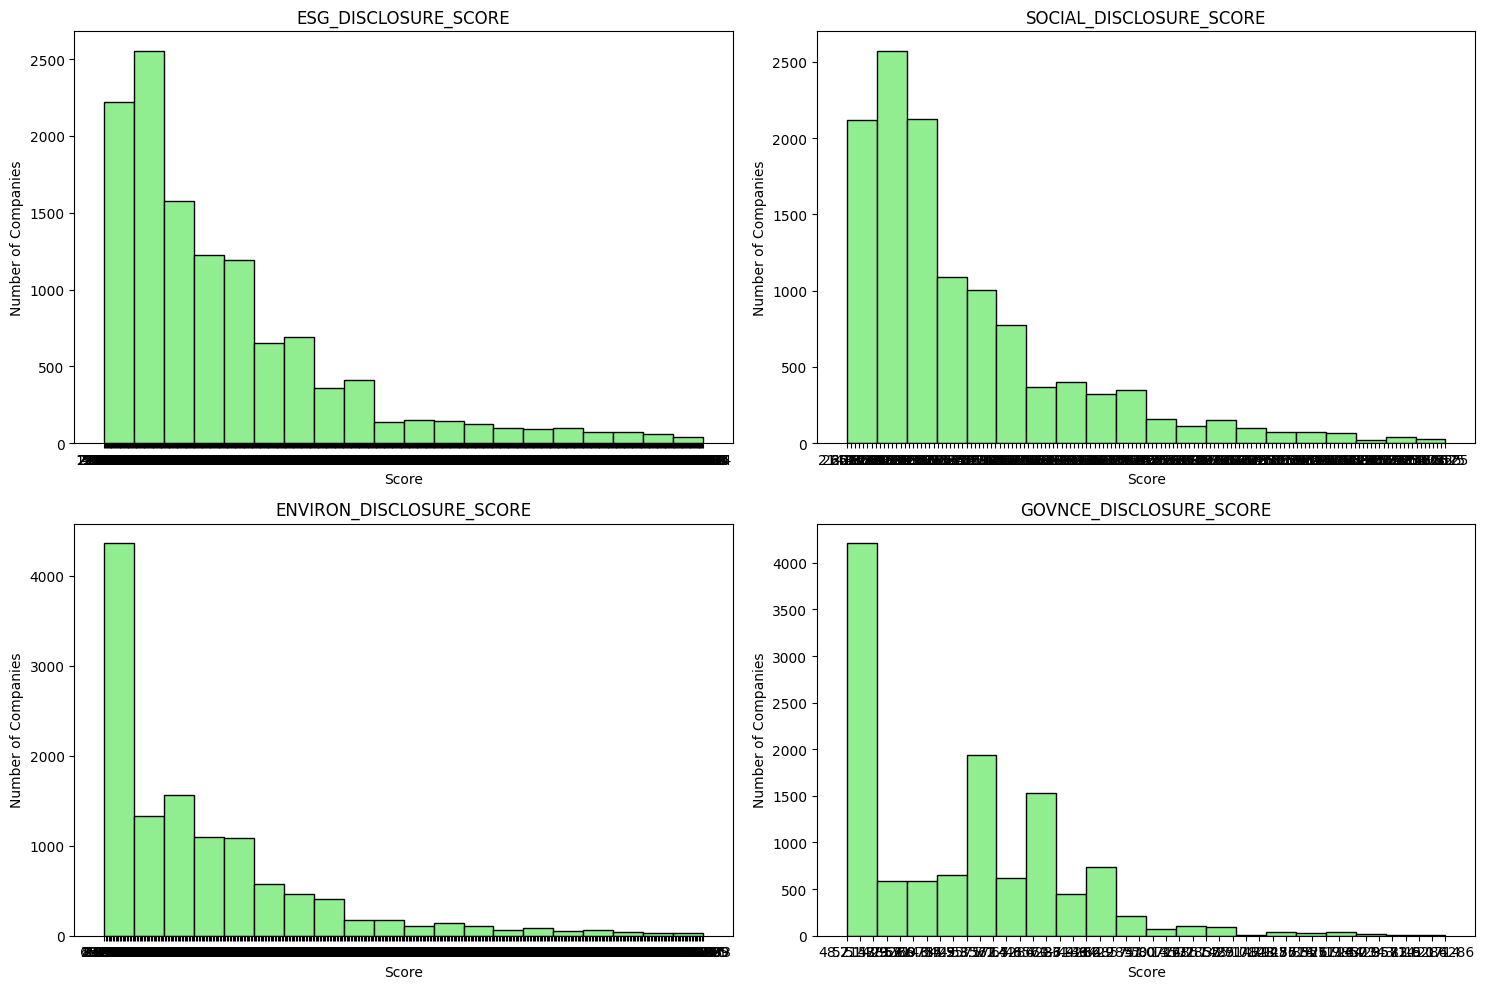

In [11]:
# Filter out the relevant columns for plotting
esg_cols = ['ESG_DISCLOSURE_SCORE', 'SOCIAL_DISCLOSURE_SCORE', 'ENVIRON_DISCLOSURE_SCORE', 'GOVNCE_DISCLOSURE_SCORE']
esg_data = data[esg_cols]

# Create a 2x2 subplot for the new dataset
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plotting each column in a separate subplot
for i, col in enumerate(esg_cols):
    ax = axs[i//2, i%2]
    ax.hist(esg_data[col].dropna(), bins=20, color='lightgreen', edgecolor='black')
    ax.set_title(col)
    ax.set_xlabel('Score')
    ax.set_ylabel('Number of Companies')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [18]:
# Inspect the esg_data_numeric DataFrame
print(esg_data_numeric.info())
print(esg_data_numeric.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11964 entries, 0 to 11963
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ESG_DISCLOSURE_SCORE      11964 non-null  object
 1   SOCIAL_DISCLOSURE_SCORE   11964 non-null  object
 2   ENVIRON_DISCLOSURE_SCORE  11964 non-null  object
 3   GOVNCE_DISCLOSURE_SCORE   11964 non-null  object
dtypes: object(4)
memory usage: 374.0+ KB
None
       ESG_DISCLOSURE_SCORE SOCIAL_DISCLOSURE_SCORE ENVIRON_DISCLOSURE_SCORE  \
count                 11964                   11964                    11964   
unique                  672                     146                      426   
top                       —                  22.807                        —   
freq                    777                     902                     1956   

       GOVNCE_DISCLOSURE_SCORE  
count                    11964  
unique                      46  
top                  

<ipython-input-19-a8ffcae2cf19>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  esg_data_numeric['ESG_DISCLOSURE_SCORE'] = pd.to_numeric(esg_data_numeric['ESG_DISCLOSURE_SCORE'], errors='coerce')
<ipython-input-19-a8ffcae2cf19>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  esg_data_numeric['SOCIAL_DISCLOSURE_SCORE'] = pd.to_numeric(esg_data_numeric['SOCIAL_DISCLOSURE_SCORE'], errors='coerce')
<ipython-input-19-a8ffcae2cf19>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

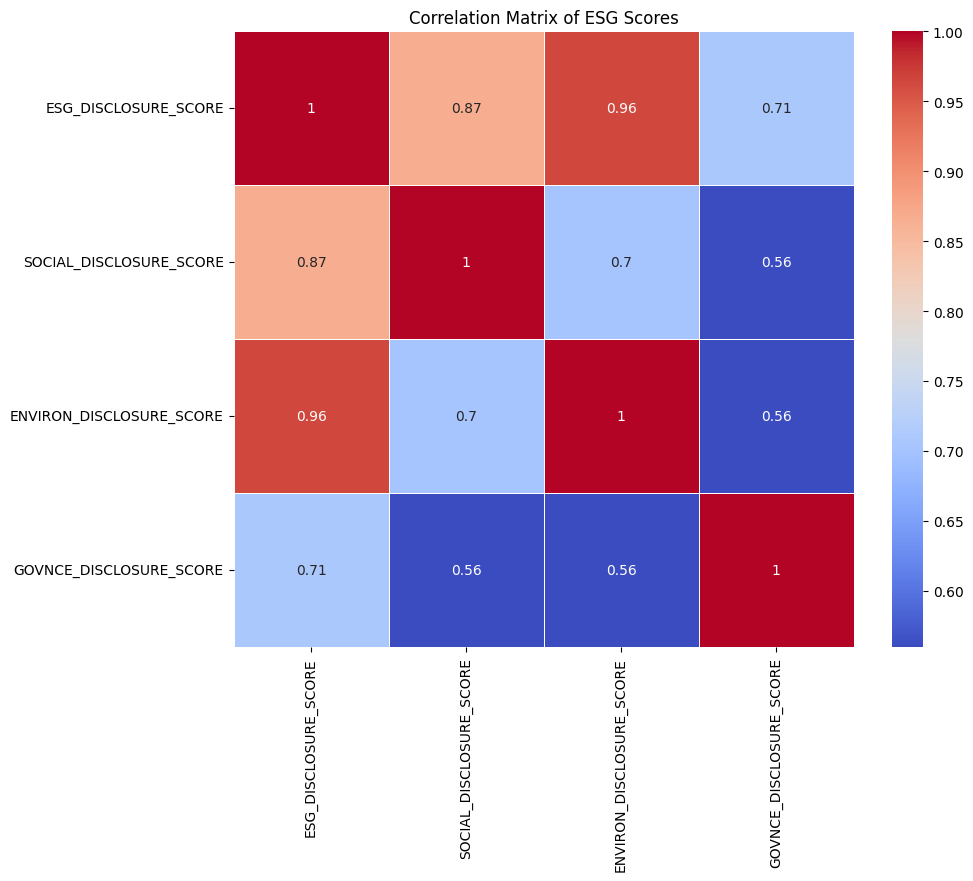

In [19]:
# Convert the columns to numeric, replacing non-numeric values with NaN
esg_data_numeric['ESG_DISCLOSURE_SCORE'] = pd.to_numeric(esg_data_numeric['ESG_DISCLOSURE_SCORE'], errors='coerce')
esg_data_numeric['SOCIAL_DISCLOSURE_SCORE'] = pd.to_numeric(esg_data_numeric['SOCIAL_DISCLOSURE_SCORE'], errors='coerce')
esg_data_numeric['ENVIRON_DISCLOSURE_SCORE'] = pd.to_numeric(esg_data_numeric['ENVIRON_DISCLOSURE_SCORE'], errors='coerce')
esg_data_numeric['GOVNCE_DISCLOSURE_SCORE'] = pd.to_numeric(esg_data_numeric['GOVNCE_DISCLOSURE_SCORE'], errors='coerce')

# Calculate the correlation matrix
correlation_matrix = esg_data_numeric.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Correlation Matrix of ESG Scores")
plt.show()


BCorp Members Data

In [28]:
# Import necessary library
import pandas as pd


# Reload the data from the CSV file
df = pd.read_excel("BCorpImpactData.xlsx")

In [25]:
# Getting all column names
column_names = data.columns.tolist()
print("Column Names:", column_names)

# Counting the number of columns
num_columns = len(data.columns)
print("Number of Columns:", num_columns)

# Counting the number of unique countries in the 'Country' column
unique_countries_count = data['country'].nunique()
print("Number of Unique Countries:", unique_countries_count)

# Counting the total number of unique companies
total_companies = data['company_name'].nunique()
print("Total Number of Unique Companies:", total_companies)

# Counting the number of companies in the United Kingdom
companies_in_uk_count = data[data['country'] == 'United Kingdom'].shape[0]
print("Number of Companies in the United Kingdom:", companies_in_uk_count)


Column Names: ['company_id', 'company_name', 'date_first_certified', 'date_certified', 'current_status', 'description', 'industry', 'industry_category', 'products_and_services', 'country', 'state', 'city', 'sector', 'size', 'b_corp_profile', 'website', 'assessment_year', 'overall_score', 'impact_area_community', 'impact_area_customers', 'impact_area_environment', 'impact_area_governance', 'impact_area_workers', 'impact_area_community_na_score', 'impact_area_customers_na_score', 'impact_area_environment_na_score', 'impact_area_governance_na_score', 'impact_area_workers_na_score', 'ia_community_it_civic_engagement_giving', 'ia_community_it_designed_for_charitable_giving', 'ia_community_it_designed_to_give', 'ia_community_it_diversity_equity_inclusion', 'ia_community_it_diversity_inclusion', 'ia_community_it_economic_impact', 'ia_community_it_job_creation', 'ia_community_it_local_economic_development', 'ia_community_it_local_involvement', 'ia_community_it_microdistribution_poverty_allevia

SMEs from FAME and BCorp data merged

In [36]:
# Import necessary library
import pandas as pd

# Reload the data from the CSV file
df = pd.read_excel("SME_Final(ESG).xlsx")

Saving SME_Final(ESG).xlsx to SME_Final(ESG).xlsx


In [37]:
# Print the list of all columns in a vertical format
column_list = df.columns.tolist()
column_list_str = "\n".join(column_list)
column_list_str

'Company name\nNumber of employees\nLast avail. yr\nEBITDA\nth GBP 2022\nEBITDA\nth GBP 2021\nEBITDA\nth GBP 2020\nEBITDA\nth GBP 2019\nEBITDA\nth GBP 2018\nEBITDA\nth GBP 2017\nEBITDA\nth GBP 2016\nEBITDA\nth GBP 2015\nEBITDA\nth GBP 2014\nEBITDA\nth GBP 2013\nEBITDA\nth GBP 2012\nEBITDA\nth GBP 2011\nEBITDA\nth GBP 2010\nESG_DISCLOSURE_SCORE\nSOCIAL_DISCLOSURE_SCORE\nENVIRON_DISCLOSURE_SCORE\nGOVNCE_DISCLOSURE_SCORE\nassessment_year'

<ipython-input-39-4e3dbc783960>:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  average_ebitda_all = ebitda_values.mean(axis=1)


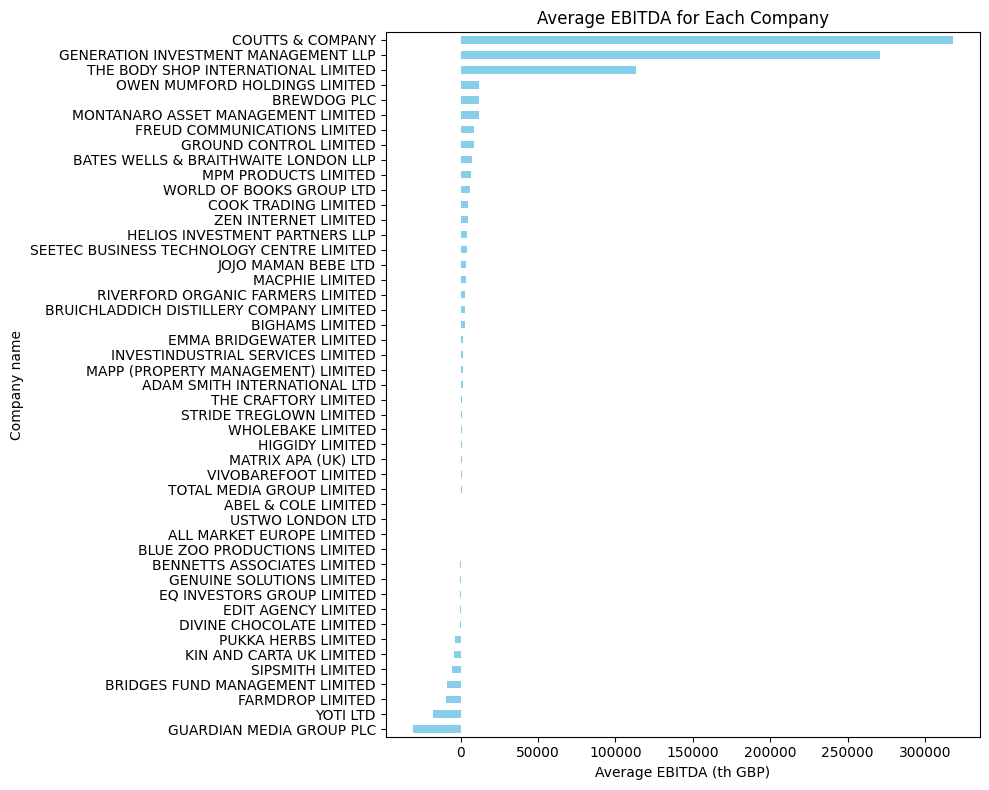

In [39]:
import matplotlib.pyplot as plt

# Selecting all columns that contain 'EBITDA' in their names
ebitda_values = df.filter(like='EBITDA')

# Calculating the mean across all EBITDA columns for each row (company)
average_ebitda_all = ebitda_values.mean(axis=1)

# Adding the company names to the series for labeling in the plot
average_ebitda_all.index = df['Company name']

# Sorting the data for better visualization
plot_data_all = average_ebitda_all.sort_values(ascending=True)

# Plotting
plt.figure(figsize=(10, 8))  # Setting the figure size
plot_data_all.plot(kind='barh', color='skyblue')  # Creating a horizontal bar plot
plt.xlabel('Average EBITDA (th GBP)')  # Setting x-axis label
plt.title('Average EBITDA for Each Company')  # Setting title of the plot
plt.tight_layout()  # Adjusting the layout

# Displaying the plot
plt.show()


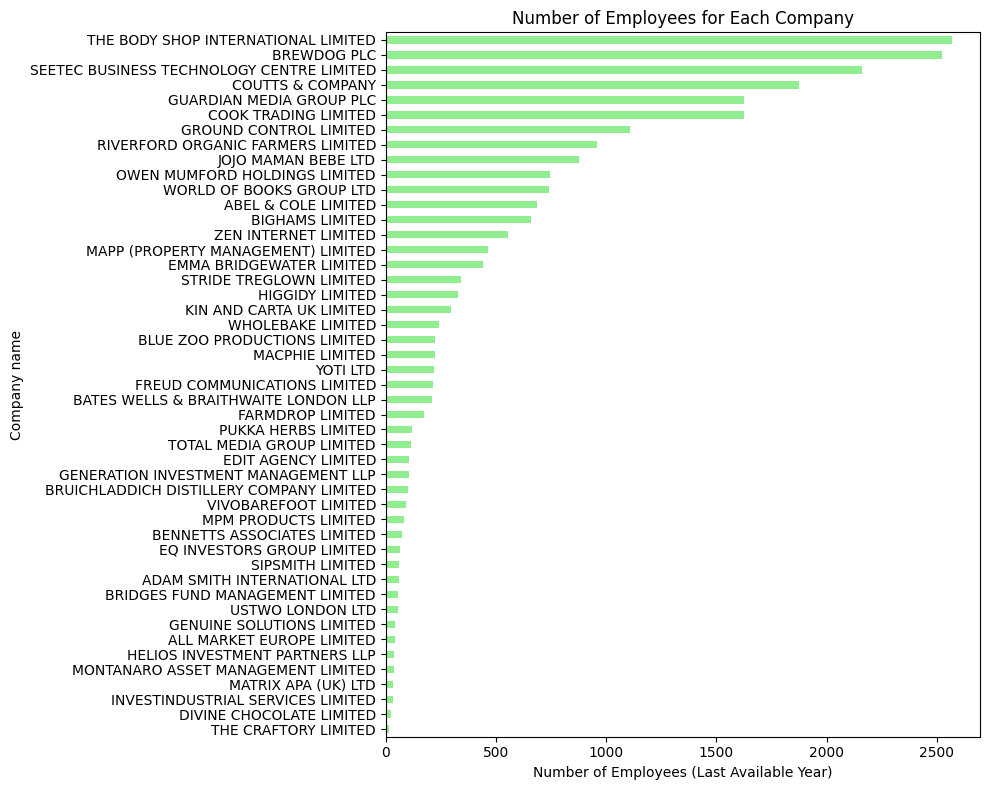

In [41]:
# Number of Employees for Each Company
plt.figure(figsize=(10, 8))
df.set_index('Company name')['Number of employees\nLast avail. yr'].sort_values().plot(kind='barh', color='lightgreen')
plt.xlabel('Number of Employees (Last Available Year)')
plt.title('Number of Employees for Each Company')
plt.tight_layout()
plt.show()

BCorp ESG EDA

In [1]:
# Import necessary library
import pandas as pd


# Reload the data from the CSV file
data = pd.read_csv("Final_SME_ESG_Fame.csv")

Saving Final_SME_ESG_Fame.csv to Final_SME_ESG_Fame.csv


In [2]:
# Display the first few rows of the dataframe to understand its structure and content
data.head()

Company name  ESG_DISCLOSURE_SCORE  SOCIAL_DISCLOSURE_SCORE  \
0  ABEL & COLE LIMITED                   NaN                      NaN   
1  ABEL & COLE LIMITED                   NaN                      NaN   
2  ABEL & COLE LIMITED                   NaN                      NaN   
3  ABEL & COLE LIMITED                   NaN                      NaN   
4  ABEL & COLE LIMITED                   NaN                      NaN   

   ENVIRON_DISCLOSURE_SCORE  GOVNCE_DISCLOSURE_SCORE  Year    EBITDA  
0                       NaN                      NaN  2022  5127.000  
1                       NaN                      NaN  2010  1972.045  
2                       NaN                      NaN  2012  3992.130  
3                       NaN                      NaN  2013   546.000  
4                       NaN                      NaN  2014  5122.000

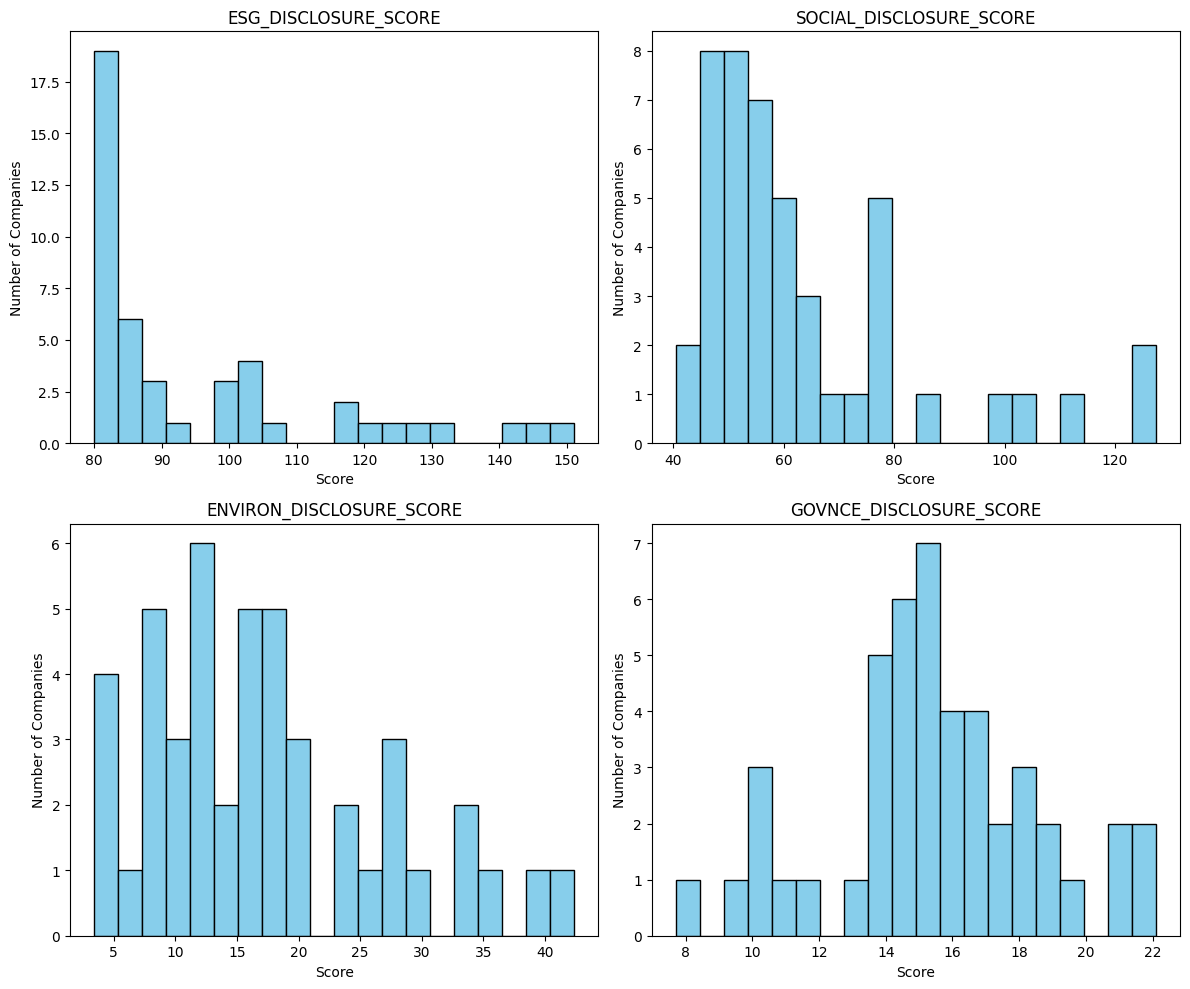

In [3]:
import matplotlib.pyplot as plt

# Filter out the relevant columns for plotting
esg_cols = ['ESG_DISCLOSURE_SCORE', 'SOCIAL_DISCLOSURE_SCORE', 'ENVIRON_DISCLOSURE_SCORE', 'GOVNCE_DISCLOSURE_SCORE']
esg_data = data[esg_cols]

# Create a 2x2 subplot
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plotting each column in a separate subplot
for i, col in enumerate(esg_cols):
    ax = axs[i//2, i%2]
    ax.hist(esg_data[col].dropna(), bins=20, color='skyblue', edgecolor='black')
    ax.set_title(col)
    ax.set_xlabel('Score')
    ax.set_ylabel('Number of Companies')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


Feature Engineering for Compound Annual Growth Rate (CAGR)

In [ ]:
# Import necessary library
import pandas as pd

# Reload the data from the CSV file
data = pd.read_csv("Bloom_cleaned_data.csv")

Saving Bloom_cleaned_data.csv to Bloom_cleaned_data.csv


In [ ]:
# Calculating the Compound Annual Growth Rate (CAGR) of EBITDA for each company
# Grouping the data by company name
grouped = data.groupby('Name')

# Function to calculate CAGR
def calculate_cagr(data):
    start_value = data['EBITDA'].iloc[0]
    end_value = data['EBITDA'].iloc[-1]
    n = len(data['Year'].unique())
    if start_value == 0:
        return 0
    else:
        return (end_value / start_value) ** (1 / n) - 1

# Applying the function to each group
cagr = grouped.apply(calculate_cagr)

# Calculating the average of the specified scores for each company
avg_scores = grouped[['ESG_DISCLOSURE_SCORE', 'GOVNCE_DISCLOSURE_SCORE', 'SOCIAL_DISCLOSURE_SCORE', 'ENVIRON_DISCLOSURE_SCORE']].mean()

# Combining the CAGR and average scores
combined_data = pd.concat([avg_scores, cagr], axis=1)
combined_data = combined_data.rename(columns={0: 'EBITDA_CAGR'})

# Resetting index to have 'Name' as a column
combined_data.reset_index(inplace=True)



<ipython-input-2-44d0b3d7ea21>:13: RuntimeWarning: invalid value encountered in double_scalars
  return (end_value / start_value) ** (1 / n) - 1


In [ ]:
# Save the combined data to a new CSV file
output_file_path = 'collapsed_company_data.csv'
combined_data.to_csv(output_file_path, index=False)

In [ ]:
uploaded = files.upload()

# Reload the data from the CSV file
data = pd.read_csv("collapsed_company_data.csv")

# Remove rows where EBITDA_CAGR is NaN
data_cleaned = data.dropna(subset=['EBITDA_CAGR'])

data_cleaned.to_csv('collapsed_company_data_no_nan.csv', index=False)


Saving collapsed_company_data.csv to collapsed_company_data (1).csv


In [ ]:
# Normalizing the specified columns using Min-Max normalization

# Columns to normalize
columns_to_normalize = ['EBITDA_CAGR', 'ESG_DISCLOSURE_SCORE', 'GOVNCE_DISCLOSURE_SCORE',
                        'SOCIAL_DISCLOSURE_SCORE', 'ENVIRON_DISCLOSURE_SCORE']

# Applying normalization
for col in columns_to_normalize:
    new_data[col] = (new_data[col] - new_data[col].min()) / (new_data[col].max() - new_data[col].min())

# Saving the updated dataframe to a new CSV file
updated_new_file_path = '/mnt/data/collapsed_company_data_no_nan_normalized.csv'
new_data.to_csv(updated_new_file_path, index=False)

updated_new_file_path


In [ ]:
# from google.colab import files
# files.download('collapsed_company_data_no_nan.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Feature Engineering for SME dataset

In [ ]:
# Import necessary library
import pandas as pd

# Reload the data from the CSV file
data = pd.read_csv("Final_SME_ESG_Fame.csv")

Saving Final_SME_ESG_Fame.csv to Final_SME_ESG_Fame.csv


In [ ]:
# Sort by 'Company name' and 'Year'
sorted_data = data.sort_values(by=['Company name', 'Year'])

# Drop duplicate years for each company
cleaned_data = sorted_data.drop_duplicates(subset=['Company name', 'Year'])

cleaned_data.head()


Company name  ESG_DISCLOSURE_SCORE  SOCIAL_DISCLOSURE_SCORE  \
1  ABEL & COLE LIMITED                   NaN                      NaN   
7  ABEL & COLE LIMITED                   NaN                      NaN   
2  ABEL & COLE LIMITED                   NaN                      NaN   
3  ABEL & COLE LIMITED                   NaN                      NaN   
4  ABEL & COLE LIMITED                   NaN                      NaN   

   ENVIRON_DISCLOSURE_SCORE  GOVNCE_DISCLOSURE_SCORE  Year    EBITDA  
1                       NaN                      NaN  2010  1972.045  
7                       NaN                      NaN  2011  2889.064  
2                       NaN                      NaN  2012  3992.130  
3                       NaN                      NaN  2013   546.000  
4                       NaN                      NaN  2014  5122.000

In [ ]:
# Save to new CSV
cleaned_data.to_csv('Rearranged_Final_SME_ESG_Fame.csv', index=False)

In [ ]:
from google.colab import files
files.download('Rearranged_Final_SME_ESG_Fame.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import numpy as np

def calculate_cagr(end_value, start_value, periods):
    return (end_value / start_value) ** (1 / periods) - 1


# Remove duplicates
data_cleaned = data.drop_duplicates(subset=['Company name', 'Year'])

# Calculate EBITDA CAGR for each company
cagr_data = data_cleaned.groupby('Company name').apply(
    lambda x: calculate_cagr(x['EBITDA'].iloc[-1], x['EBITDA'].iloc[0], len(x['Year'].unique()) - 1)
    if len(x['Year'].unique()) > 1 else np.nan
)

# Create a DataFrame from the CAGR data
cagr_df = cagr_data.reset_index().rename(columns={0: 'EBITDA_CAGR'})

# Merge CAGR data back with the original data
data_with_cagr = pd.merge(data_cleaned, cagr_df, on='Company name')

# Drop the EBITDA column
data_with_cagr = data_with_cagr.drop(columns=['EBITDA'])

# Keep only rows with all ESG parameters and EBITDA present
filtered_data = data_with_cagr.dropna(subset=['ESG_DISCLOSURE_SCORE', 'SOCIAL_DISCLOSURE_SCORE',
                                              'ENVIRON_DISCLOSURE_SCORE', 'GOVNCE_DISCLOSURE_SCORE'])

# Save to new CSV
filtered_data.to_csv('Collapsed_Final_SME_ESG_Fame.csv', index=False)


<ipython-input-12-107de1071e87>:4: RuntimeWarning: invalid value encountered in double_scalars
  return (end_value / start_value) ** (1 / periods) - 1


In [ ]:
from google.colab import files
files.download('Collapsed_Final_SME_ESG_Fame.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Normalizing the EBITDA_CAGR column

# Normalizing EBITDA_CAGR using Min-Max normalization
data['EBITDA_CAGR'] = (data['EBITDA_CAGR'] - data['EBITDA_CAGR'].min()) / (data['EBITDA_CAGR'].max() - data['EBITDA_CAGR'].min())


# Saving the updated dataframe to a new CSV file
updated_file_path = '/mnt/data/normalized_Collapsed_SME_FAME_BCorp_updated.csv'
data.to_csv(updated_file_path, index=False)

updated_file_path


Pre-processing for news-related SMEs data for sentiment analysis


In [1]:
# Import necessary library
import pandas as pd

# Reload the data from the CSV file
data = pd.read_csv("cleaned_main_df.csv")

Saving cleaned_main_df.csv to cleaned_main_df.csv


In [2]:
# Display the first few rows of the dataset to understand its structure and columns
data.head()

Unnamed: 0  Unnamed: 0.1                      Company  \
0           0             0              Coutts  Company   
1           1             1              Coutts  Company   
2           2             2              Coutts  Company   
3           3             3  The Body Shop International   
4           4             4  The Body Shop International   

                                               Title  \
0                    Coutts CEO Peter Flavel Resigns   
1               Coutts chief Peter Flavel steps down   
2  Coutts-Trotter permanently takes on NSW treasu...   
3  The Body Shop Celebrates Canada's Ban on Cosme...   
4                  Natura & Co to Sell The Body Shop   

                                   UUID                 Published At  \
0  04f0a771-62f3-422c-b53f-a40b0fa56670  2023-07-27T13:11:22.000000Z   
1  0334ed7f-4c8c-4ecf-a361-91392b9cf168  2023-07-27T13:24:29.000000Z   
2  3a3bf900-7850-4968-89fc-1f97bbd41fd4  2023-05-22T00:26:41.000000Z   
3  35b6a48d-5521-4194-b360-b61fe2d6f069  2023-06-30T16:30:22.000000Z   
4  4352226d-3096-4434-8e93-18a59fdd024d  2023-11-14T13:15:51.000000Z   

                Categories  Relevance Score  \
0  ['politics', 'general']        32.443060   
1  ['general', 'business']        31.877266   
2             ['politics']        31.383171   
3        ['entertainment']        45.267220   
4        ['entertainment']        45.224884   

                                         Description  
0  Coutts chief executive Peter Flavel has resign...  
1  Exit from upmarket lender ‘by mutual consent’ ...  
2  Michael Coutts-Trotter, former secretary of NS...  
3  The Body Shop, Cruelty Free International, and...  
4  International private equity group Aurelius wi...

In [2]:
data_cleaned = data.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])

In [3]:
data_cleaned['Published At'] = pd.to_datetime(data_cleaned['Published At'])

In [4]:
missing_values = data_cleaned.isnull().sum()

In [5]:
# Display the cleaned data and the missing values information
data_cleaned.head(), missing_values

(                       Company  \
 0              Coutts  Company   
 1              Coutts  Company   
 2              Coutts  Company   
 3  The Body Shop International   
 4  The Body Shop International   
 
                                                Title  \
 0                    Coutts CEO Peter Flavel Resigns   
 1               Coutts chief Peter Flavel steps down   
 2  Coutts-Trotter permanently takes on NSW treasu...   
 3  The Body Shop Celebrates Canada's Ban on Cosme...   
 4                  Natura & Co to Sell The Body Shop   
 
                                    UUID              Published At  \
 0  04f0a771-62f3-422c-b53f-a40b0fa56670 2023-07-27 13:11:22+00:00   
 1  0334ed7f-4c8c-4ecf-a361-91392b9cf168 2023-07-27 13:24:29+00:00   
 2  3a3bf900-7850-4968-89fc-1f97bbd41fd4 2023-05-22 00:26:41+00:00   
 3  35b6a48d-5521-4194-b360-b61fe2d6f069 2023-06-30 16:30:22+00:00   
 4  4352226d-3096-4434-8e93-18a59fdd024d 2023-11-14 13:15:51+00:00   
 
                 Categ

In [6]:
# Fill missing values in the 'Description' column with "No Description"
data_cleaned['Description'].fillna("No Description", inplace=True)

In [7]:
# Check for any remaining missing or null values to confirm the changes
updated_missing_values = data_cleaned.isnull().sum()

data_cleaned.head(), updated_missing_values

(                       Company  \
 0              Coutts  Company   
 1              Coutts  Company   
 2              Coutts  Company   
 3  The Body Shop International   
 4  The Body Shop International   
 
                                                Title  \
 0                    Coutts CEO Peter Flavel Resigns   
 1               Coutts chief Peter Flavel steps down   
 2  Coutts-Trotter permanently takes on NSW treasu...   
 3  The Body Shop Celebrates Canada's Ban on Cosme...   
 4                  Natura & Co to Sell The Body Shop   
 
                                    UUID              Published At  \
 0  04f0a771-62f3-422c-b53f-a40b0fa56670 2023-07-27 13:11:22+00:00   
 1  0334ed7f-4c8c-4ecf-a361-91392b9cf168 2023-07-27 13:24:29+00:00   
 2  3a3bf900-7850-4968-89fc-1f97bbd41fd4 2023-05-22 00:26:41+00:00   
 3  35b6a48d-5521-4194-b360-b61fe2d6f069 2023-06-30 16:30:22+00:00   
 4  4352226d-3096-4434-8e93-18a59fdd024d 2023-11-14 13:15:51+00:00   
 
                 Categ

In [8]:
# Descriptive Statistics for 'Relevance Score'

# Calculating descriptive statistics for the 'Relevance Score' column
relevance_score_stats = data_cleaned['Relevance Score'].describe()

relevance_score_stats

count    453.000000
mean      27.368547
std       11.032695
min        1.637818
25%       20.222445
50%       27.409771
75%       34.444400
max       77.963090
Name: Relevance Score, dtype: float64

In [15]:
# Text Analysis on 'Title' and 'Description' Columns


import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Cleaning the data
data_cleaned = data.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
data_cleaned['Published At'] = pd.to_datetime(data_cleaned['Published At'])
data_cleaned['Description'].fillna("No Description", inplace=True)


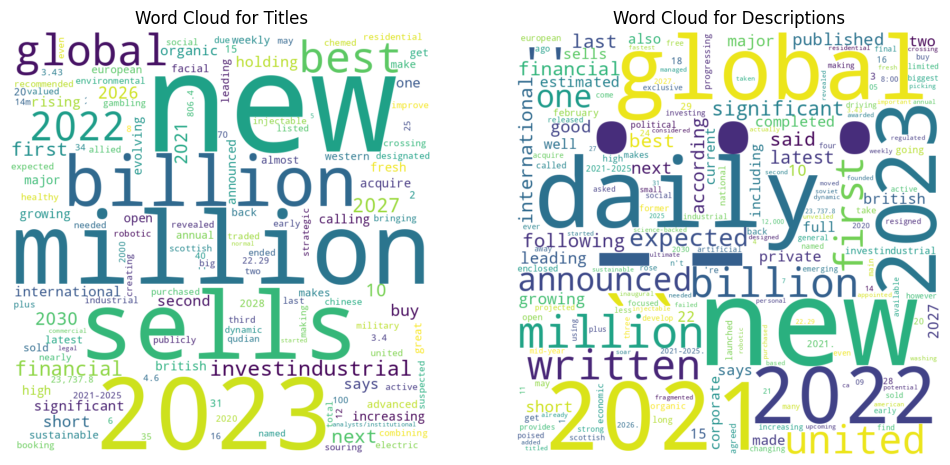

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
import string



# Function to filter tokens
def filter_tokens(tokens):
    stop_words = set(stopwords.words('english') + list(string.punctuation) + ["'s"])
    return [word for word in tokens if word not in stop_words and pos_tag([word])[0][1] not in ['NN', 'NNS', 'NNP', 'NNPS', 'PRP', 'PRP$', 'IN', 'DT']]

# Processing 'Title' column
title_text = ' '.join(data_cleaned['Title'].dropna().apply(str)).lower()
title_tokens = word_tokenize(title_text)
filtered_title_tokens = filter_tokens(title_tokens)
title_word_freq = Counter(filtered_title_tokens)
title_wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate_from_frequencies(title_word_freq)

# Processing 'Description' column
description_text = ' '.join(data_cleaned['Description'].dropna().apply(str)).lower()
description_tokens = word_tokenize(description_text)
filtered_description_tokens = filter_tokens(description_tokens)
description_word_freq = Counter(filtered_description_tokens)
description_wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate_from_frequencies(description_word_freq)


# Displaying word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(title_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for Titles')

plt.subplot(1, 2, 2)
plt.imshow(description_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for Descriptions')
plt.show()




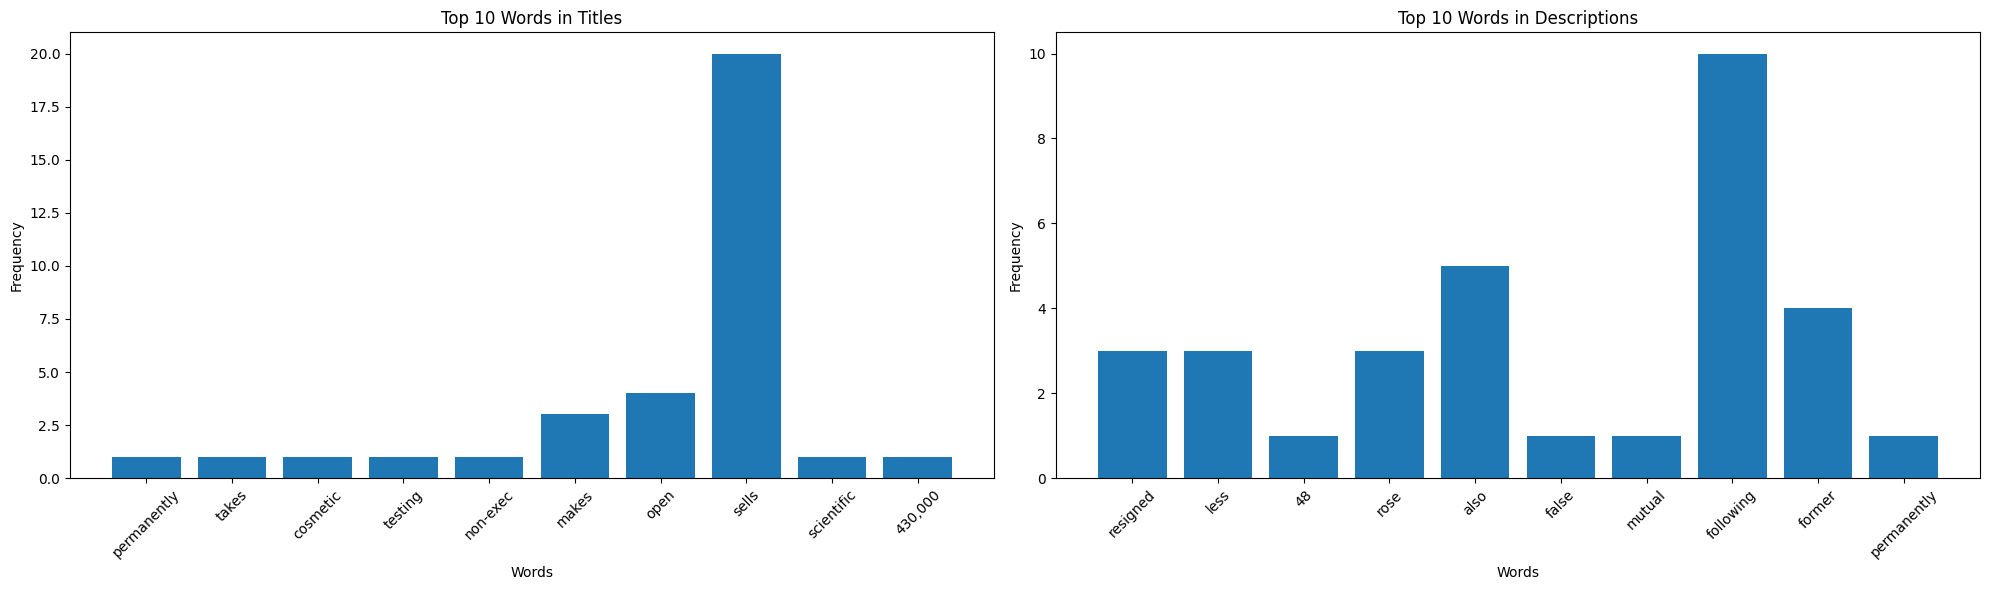

In [13]:
# Function to create histograms
def create_histograms(title_word_freq, description_word_freq):
    # Data for Title histogram
    title_words = list(title_word_freq.keys())[:10]
    title_frequencies = list(title_word_freq.values())[:10]

    # Data for Description histogram
    description_words = list(description_word_freq.keys())[:10]
    description_frequencies = list(description_word_freq.values())[:10]

    fig, axs = plt.subplots(1, 2, figsize=(20, 6))

    # Title Histogram
    axs[0].bar(title_words, title_frequencies)
    axs[0].set_title('Top 10 Words in Titles')
    axs[0].set_xlabel('Words')
    axs[0].set_ylabel('Frequency')
    axs[0].tick_params(axis='x', rotation=45)

    # Description Histogram
    axs[1].bar(description_words, description_frequencies)
    axs[1].set_title('Top 10 Words in Descriptions')
    axs[1].set_xlabel('Words')
    axs[1].set_ylabel('Frequency')
    axs[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

# Call the function to create histograms as subplots
create_histograms(title_word_freq, description_word_freq)